In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from chart_studio.plotly import plot, iplot
import cufflinks as cf
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_excel("Data_Train.xlsx")

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Automated EDA

In [4]:
import pandas_profiling as pf

C:\Users\miche\AppData\Local\Temp\ipykernel_27928\3468475291.py:1: DeprecationWarning:

`import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.



In [5]:
pf.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Manual EDA

In [6]:
df.shape

(10683, 11)

In [7]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [8]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
# remove the NaN values from the dataset
df.dropna(how='any', inplace=True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Feature Engineering 

Lets convert Date_of_Journey to its appropriate format as datetime with regards to day and month

In [10]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


### Date_of_journey

In [12]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])

df['Day_of_Journey']=(df['Date_of_Journey']).dt.day
df['Month_of_Journey']=(df['Date_of_Journey']).dt.month

In [13]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,1970-01-01 00:00:00.000000024,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,1,1
1,Air India,1970-01-01 00:00:00.000000005,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,1
2,Jet Airways,1970-01-01 00:00:00.000000006,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,1,1


In [14]:
# We can now drop the date of journey
df.drop(["Date_of_Journey"], axis=1, inplace=True)

### Dep_time

In [15]:
# convert to datetime
df['Dep_hr']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute

In [16]:
# we can now drop the dep_time
df.drop(["Dep_Time"], axis=1, inplace=True)

### Arrival_time

In [17]:
df['Arrival_hr']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min']=pd.to_datetime(df['Arrival_Time']).dt.minute

In [18]:
#we can now drop the 'Arrival_Time'

df.drop(["Arrival_Time"],axis=1,inplace=True)

### Duration Time

In [19]:
duration=df['Duration'].str.split(' ',expand=True) #split duration datapoints based on space ' '
duration[1].fillna('00m',inplace=True)   #fill all "NAN" with '00m'
df['duration_hr']=duration[0].apply(lambda x: x[:-1]) #select the item at index o and leave the last one (in this case the 'h')
df['duration_min']=duration[1].apply(lambda x: x[:-1]) #select the item at index 1 and leave the last one (in this

In [20]:
# We can now drop the duration

df.drop(["Duration"], axis=1, inplace=True)

In [21]:
df.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,1,1,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,1,1,9,25,4,25,19,00


In [22]:
cf.set_config_file(theme='ggplot', sharing='public', offline=True)

### Count of Airlines

In [23]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

### Airline vs Price

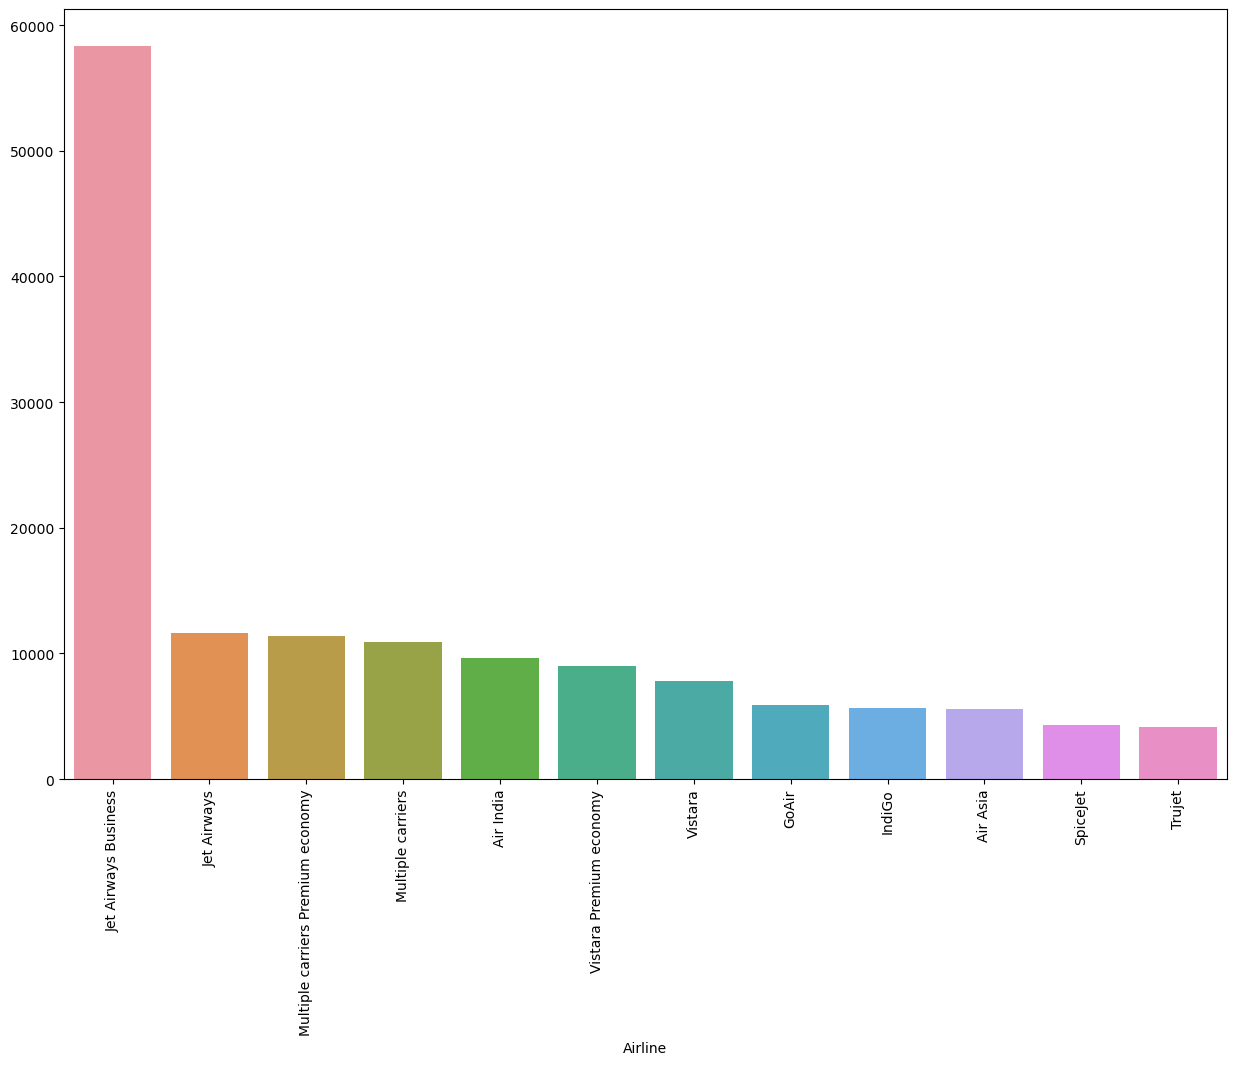

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping and calculating mean
Airprices = df.groupby('Airline')['Price'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(15,10))
sns.barplot(x=Airprices.index, y=Airprices.values)
plt.xticks(rotation=90)  # changed from 270 to 90 for vertical rotation
plt.show()


Jet Airway Business has the highest price with Trujet having the lowest


<function matplotlib.pyplot.show(close=None, block=None)>

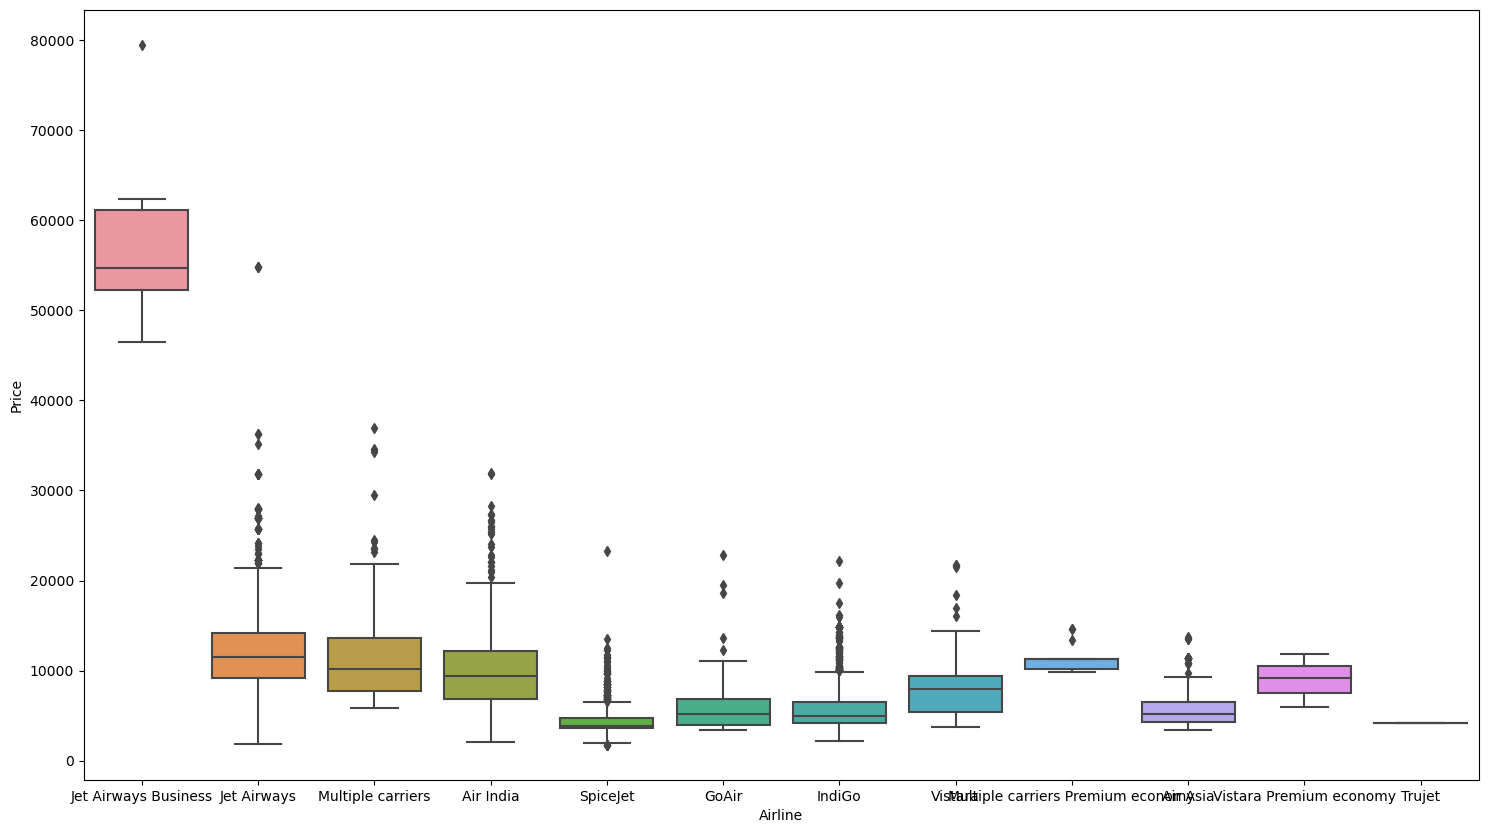

In [29]:
plt.figure(figsize=(18,10))
sns.boxplot(y='Price', x='Airline', data=df.sort_values('Price', ascending=False))
plt.show

### Price based on number of stops

In [30]:
df.groupby(['Airline', 'Total_Stops'])['Price'].mean()

Airline                            Total_Stops
Air Asia                           1 stop          7078.325581
                                   2 stops         6341.888889
                                   non-stop        4492.331492
Air India                          1 stop          9041.509259
                                   2 stops        12092.779101
                                   3 stops        12208.054054
                                   4 stops        17686.000000
                                   non-stop        5605.326139
GoAir                              1 stop          6884.676471
                                   non-stop        4726.173913
IndiGo                             1 stop          7104.717528
                                   2 stops         7507.526316
                                   non-stop        4731.174053
Jet Airways                        1 stop         12512.741223
                                   2 stops        13387.247467
        

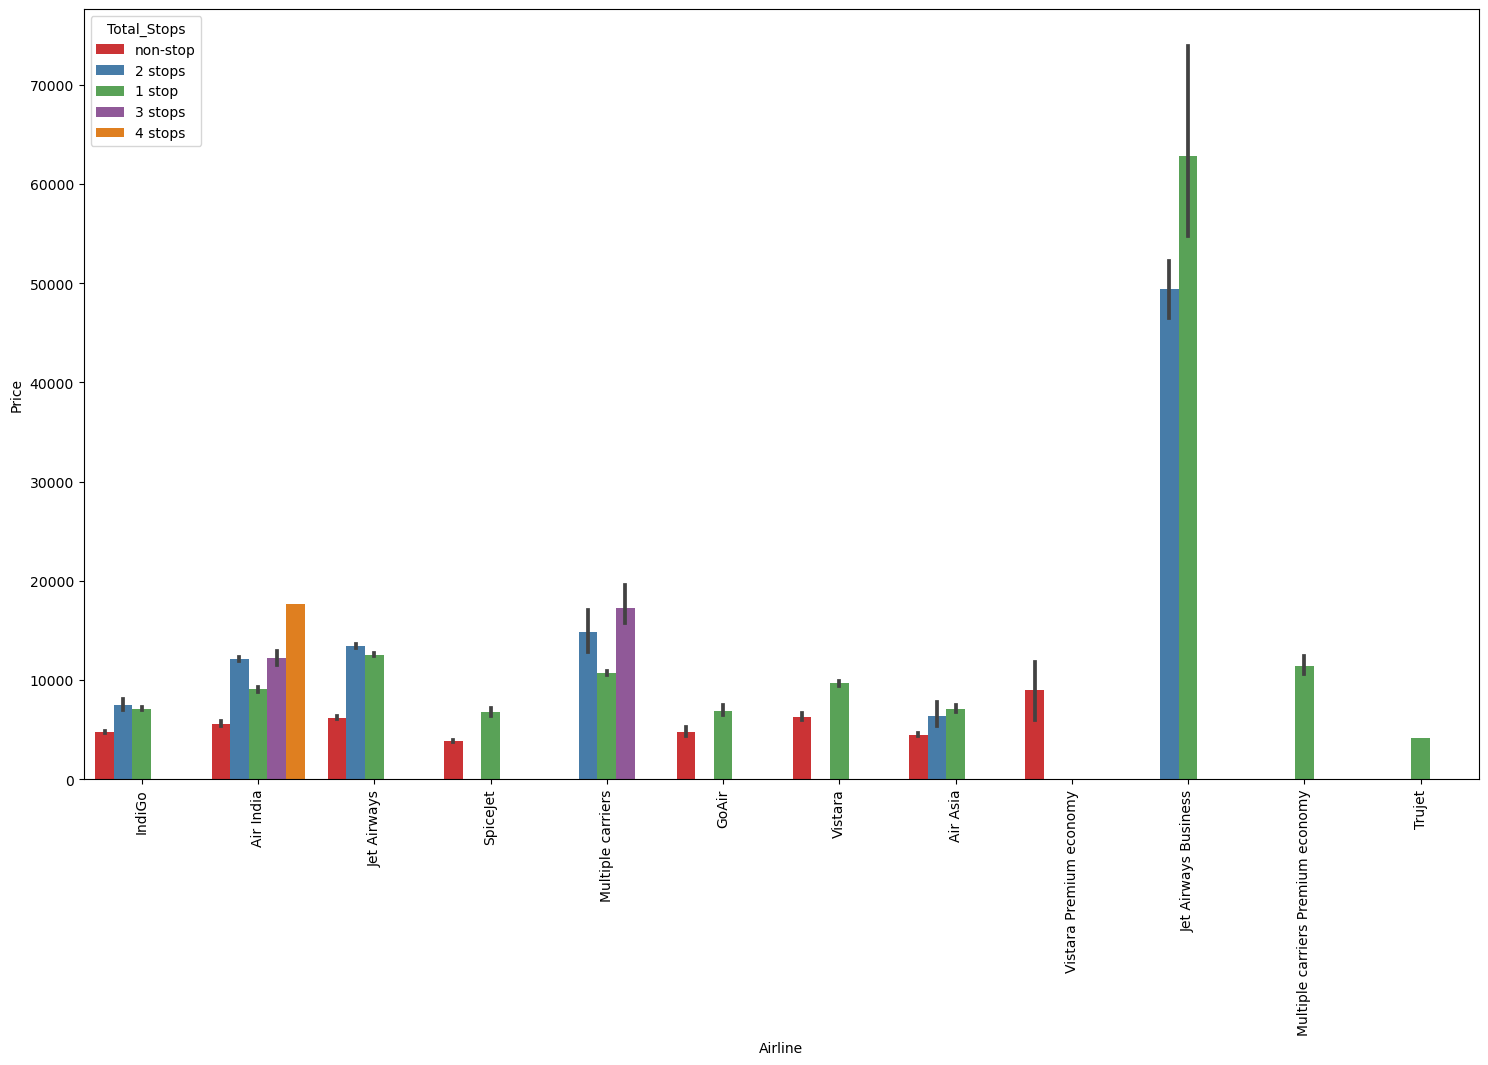

In [31]:
plt.figure(figsize=(18,10))
ax=sns.barplot(x=df['Airline'],y=df['Price'],hue=df['Total_Stops'],palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

One stop and two stops Jet Airways Business is having the highest price

In [32]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

### Source vs Price

<function matplotlib.pyplot.show(close=None, block=None)>

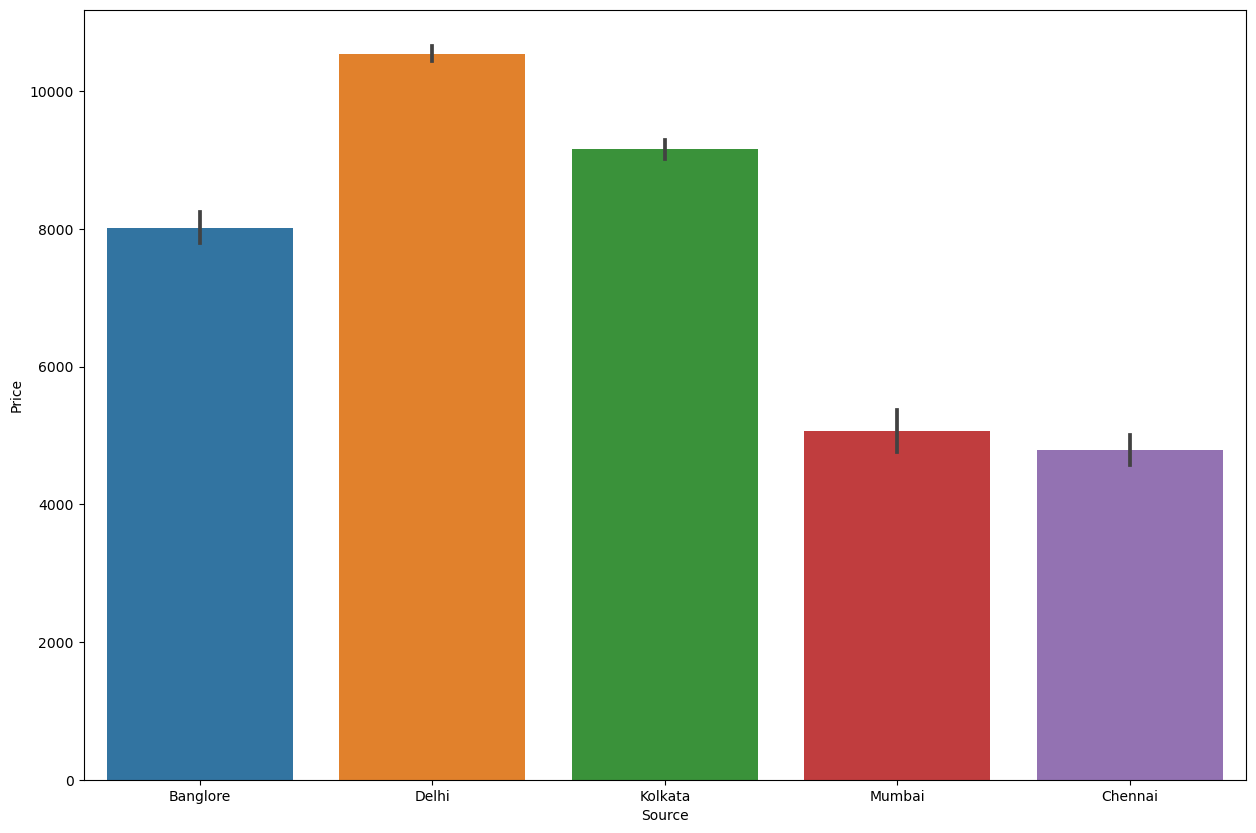

In [33]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Source',data=df.sort_values('Price',ascending=False))
plt.show

### Destination vs Price

<function matplotlib.pyplot.show(close=None, block=None)>

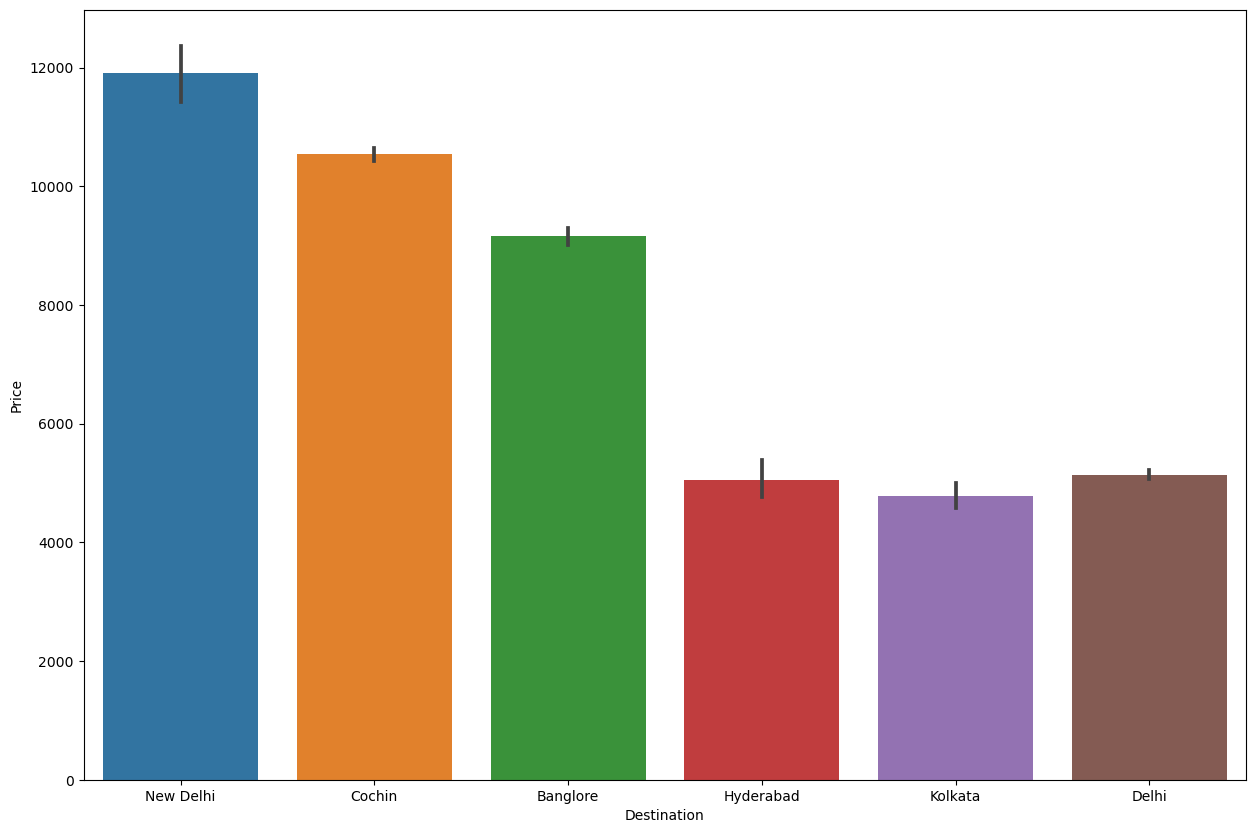

In [34]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.show

In [35]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [36]:
for i in df:
    df.replace('New Delhi', 'Delhi', inplace=True)

In [37]:
df['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

<function matplotlib.pyplot.show(close=None, block=None)>

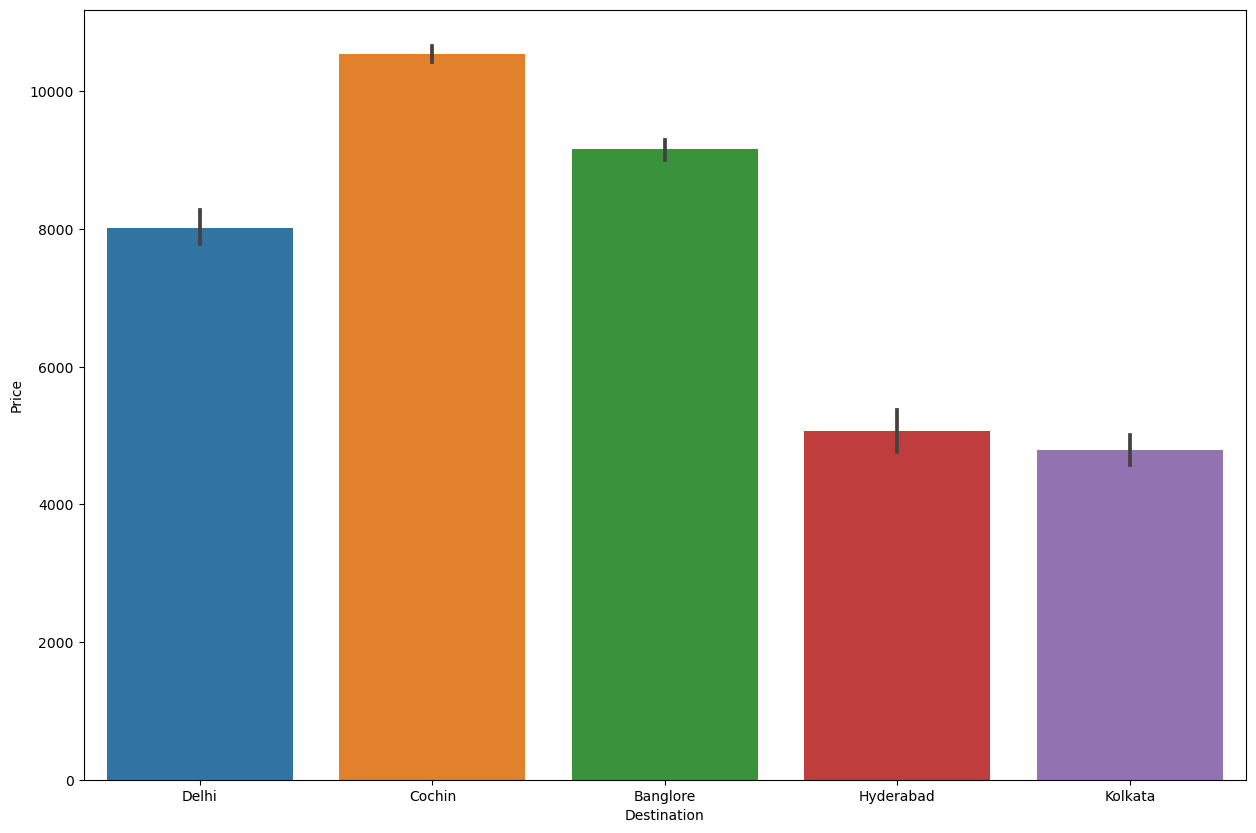

In [38]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.show

In [39]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<Axes: >

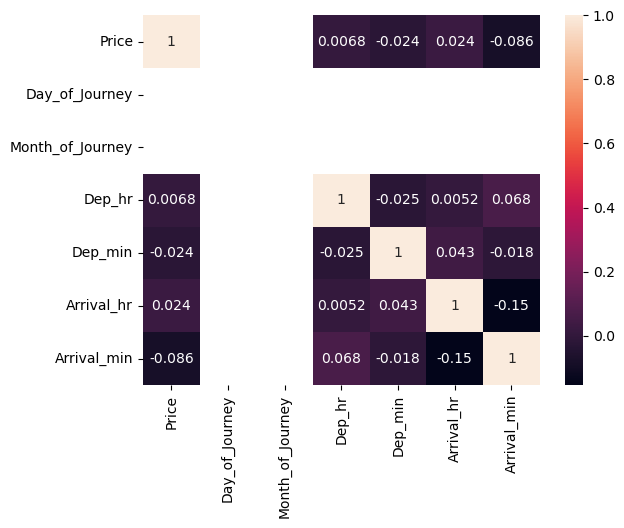

In [41]:
sns.heatmap(df.corr(numeric_only=True), annot=True)


The features are less correlated which is a good thing for us to avoid multicollinearity

### Apply Onehot Encoding to the categorical variables

In [43]:
# Handling Categorical Values 

# Map the 'Total_Stops' column values to their respective integer values.
# This is done to convert the categorical data in 'Total_Stops' column into numeric data
# which can be used by machine learning algorithms.
# For instance, 'non-stop' flights become 0, '1 stop' flights become 1, and so on.
df['Total_Stops'] = df['Total_Stops'].map({'non-stop': 0, '2 stops': 2, '1 stop': 1, '3 stops': 3, '4 stops': 4})

# Create dummy variables for the 'Airline' column. 
# Dummy variables are a way of encoding categorical data as numeric, where each category gets 
# its own column with a binary value (0 or 1).
# The parameter `drop_first=True` ensures that the first category is dropped, preventing multicollinearity.
# Multicollinearity is a situation where two or more predictor variables in a regression model are highly correlated.
air_dummy = pd.get_dummies(df['Airline'], drop_first=True)

# Create dummy variables for the 'Source' and 'Destination' columns in the same way as above.
# By using dummy variables, we're converting these categorical columns into a format that 
# can be provided to a machine learning algorithm to make predictions.
source_dest_dummy = pd.get_dummies(df[['Source', 'Destination']], drop_first=True)

# Concatenate (or combine) the original DataFrame (df) with the newly created dummy DataFrames (air_dummy and source_dest_dummy).
# This is done using the `concat` method of pandas and we're combining along columns (hence axis=1).
# The result is a DataFrame with the original columns, as well as the newly created dummy columns.
df = pd.concat([air_dummy, source_dest_dummy, df], axis=1)


In [44]:
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,1,1,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,1,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,1,1,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,1,1,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,1,1,16,50,21,35,4,45


In [45]:
df.drop(['Airline', 'Source', 'Destination'], inplace=True, axis=1)

In [46]:
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,1,1,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,1,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,1,1,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,1,1,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,1,1,16,50,21,35,4,45


In [47]:
df.shape

(10682, 31)

## Test Data

In [48]:
df_test=pd.read_excel("Test_set.xlsx")

In [49]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


### Lets perform that same steps as we did for train data earlier

In [50]:
df_test['Date_of_Journey']=pd.to_datetime(df_test['Date_of_Journey'])
df_test['Day_of_Journey']=(df_test['Date_of_Journey']).dt.day
df_test['Month_of_Journey']=(df_test['Date_of_Journey']).dt.month

#Dep_time 
df_test['Dep_hr']=pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_min']=pd.to_datetime(df_test['Dep_Time']).dt.minute

#Arrival_time
df_test['Arrival_hr']=pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_min']=pd.to_datetime(df_test['Arrival_Time']).dt.minute

#Splitting duration  time

a=df_test['Duration'].str.split(' ',expand=True)
a[1].fillna('00m',inplace=True)
df_test['dur_hr']=a[0].apply(lambda x: x[:-1])
df_test['dur_min']=a[1].apply(lambda x: x[:-1])

#dropping the data
df_test.drop(['Date_of_Journey','Duration','Arrival_Time','Dep_Time'],inplace=True,axis=1)

#Handling Categorical Values 
df_test['Total_Stops']=df_test['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

air_dummy=pd.get_dummies(df_test['Airline'],drop_first=True)
source_dest_dummy=pd.get_dummies(df_test[['Source','Destination']],drop_first=True)
df_test=pd.concat([air_dummy,source_dest_dummy,df_test],axis=1)

C:\Users\miche\AppData\Local\Temp\ipykernel_27928\2351586788.py:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [51]:
df_test.drop(['Airline','Source','Destination','Additional_Info',"Route"],inplace=True,axis=1)

In [52]:
print('train_shape', df.shape)
print('test_shape', df_test.shape)

train_shape (10682, 31)
test_shape (2671, 28)


In [53]:
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,1,1,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,1,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,1,1,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,1,1,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,1,1,16,50,21,35,4,45


In [54]:
x=df.drop(['Route', 'Price','Additional_Info'],axis=1)
y=df['Price']

In [55]:
x.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Destination_Kolkata,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,0,2,1,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,0,2,1,1,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,0,1,1,1,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,0,1,1,1,16,50,21,35,4,45


# Model Building and Hyperparameter Tuning

## ExtraTreesRegressor

In [56]:
from sklearn.ensemble import ExtraTreesRegressor
ET_Model = ExtraTreesRegressor()
ET_Model.fit(x, y)

ExtraTreesRegressor()

### Feature Importance 

<Axes: >

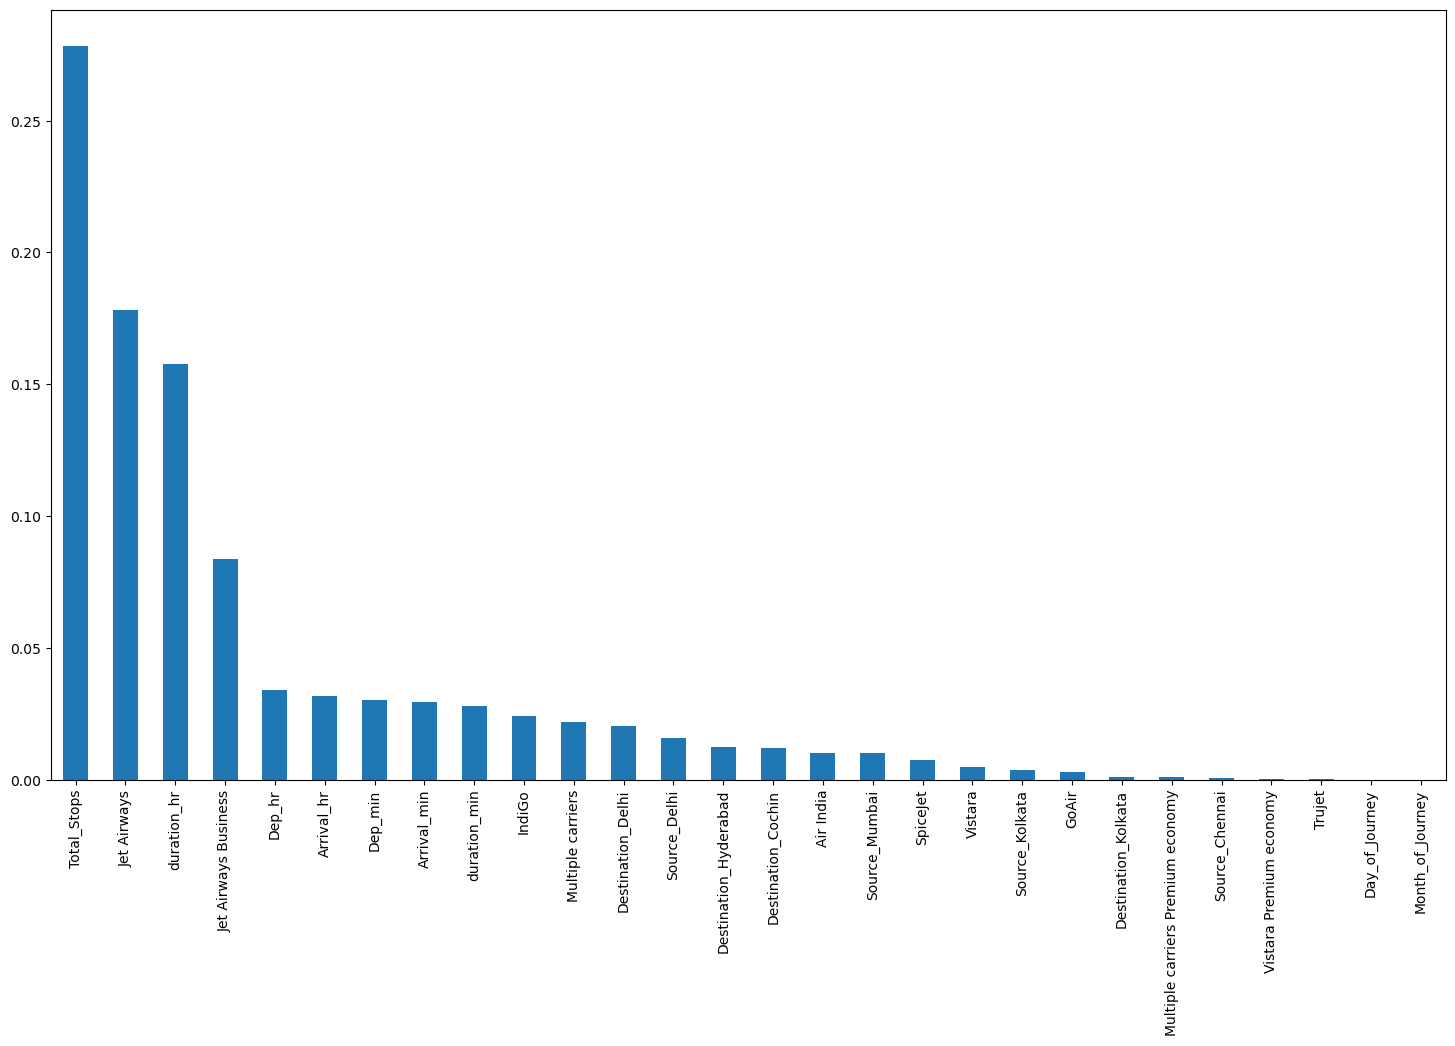

In [57]:
pd.Series(ET_Model.feature_importances_,index=x.columns).sort_values(ascending=False).plot(kind='bar',figsize=(18,10))


In [58]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

In [62]:
# Preparing Extra Tree Regression
from sklearn.ensemble import ExtraTreesRegressor
ET_Model = ExtraTreesRegressor(n_estimators=120)
ET_Model = ET_Model.fit(X_train, y_train)
y_predict = ET_Model.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.542267706949157

In [63]:
from sklearn.ensemble import RandomForestRegressor
RF_Model = RandomForestRegressor()
RF_Model.fit(X_train, y_train)
y_predict = ET_Model.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.542267706949157

### Hyperparameter

In [65]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 80, stop = 1500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(6, 45, num = 5)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

# create random grid

rand_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf=RandomForestRegressor()

rCV=RandomizedSearchCV(estimator=rf,param_distributions=rand_grid,scoring='neg_mean_squared_error',n_iter=10,cv=3,random_state=42, n_jobs = 1)


In [66]:
rCV.fit(X_train, y_train)

c:\Users\miche\anaconda3\envs\fsds\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.

c:\Users\miche\anaconda3\envs\fsds\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.

c:\Users\miche\anaconda3\envs\fsds\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default valu

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [6, 15, 25, 35, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [80, 237, 395, 553, 711,
                                                         868, 1026, 1184, 1342,
                                                         1500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [67]:
rf_pred = rCV.predict(X_test)
rf_pred

array([10659.71535376,  4561.37302568,  6443.17652437, ...,
       12060.82992541,  8703.50103947,  8956.79255029])

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('MAE', mean_absolute_error(y_test, rf_pred))
print('MSE', mean_squared_error(y_test, rf_pred))

MAE 1671.1700165334257
MSE 7883935.017508968


In [69]:
r2_score(y_test, rf_pred)

0.6160485226309004

In [79]:
from catboost import CatBoostRegressor

CAT_Model = CatBoostRegressor()
CAT_Model.fit(X_train, y_train)

Learning rate set to 0.057463
0:	learn: 4487.4244762	total: 4.66ms	remaining: 4.65s
1:	learn: 4349.4529707	total: 6.64ms	remaining: 3.31s
2:	learn: 4229.6562402	total: 9.13ms	remaining: 3.03s
3:	learn: 4123.3207439	total: 11.8ms	remaining: 2.94s
4:	learn: 4020.8641789	total: 13.6ms	remaining: 2.7s
5:	learn: 3923.5598859	total: 15.7ms	remaining: 2.6s
6:	learn: 3831.0420089	total: 18.2ms	remaining: 2.58s
7:	learn: 3750.9441799	total: 20.5ms	remaining: 2.54s
8:	learn: 3677.2566142	total: 22.2ms	remaining: 2.44s
9:	learn: 3602.6536613	total: 24ms	remaining: 2.38s
10:	learn: 3540.6724210	total: 26ms	remaining: 2.33s
11:	learn: 3479.0435280	total: 28.1ms	remaining: 2.31s
12:	learn: 3429.1946521	total: 29.9ms	remaining: 2.27s
13:	learn: 3381.6484261	total: 31.6ms	remaining: 2.22s
14:	learn: 3339.6115685	total: 35.3ms	remaining: 2.32s
15:	learn: 3298.1787500	total: 37.6ms	remaining: 2.31s
16:	learn: 3257.7304644	total: 39.3ms	remaining: 2.27s
17:	learn: 3224.5757216	total: 40.9ms	remaining: 2.

In [80]:
cat_pred = cat.predict(X_test)

In [81]:
r2_score(y_test, cat_pred)

0.6158847107354382

In [82]:
X_train[['duration_hr','duration_min']]=X_train[['duration_hr','duration_min']].astype(int)
X_test[['duration_hr','duration_min']]=X_test[['duration_hr','duration_min']].astype(int)

In [83]:
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor()
lgb_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000640 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 160
[LightGBM] [Info] Number of data points in the train set: 8545, number of used features: 22
[LightGBM] [Info] Start training from score 9056.953189


LGBMRegressor()

In [84]:
lgb_pred = lgb_model.predict(X_test)
r2_score(y_test, lgb_pred)

0.6148388530312892

In [85]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
r2_score(y_test, xgb_pred)

0.5950888460576115

In [86]:
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,1,1,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,1,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,1,1,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,1,1,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,1,1,16,50,21,35,4,45


In [87]:
# #Use pickle to save our model so that we can use it later

import pickle
# saving model to disk 
pickle.dump(CAT_Model, open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

In [88]:
df.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Route', 'Total_Stops', 'Additional_Info', 'Price', 'Day_of_Journey',
       'Month_of_Journey', 'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min',
       'duration_hr', 'duration_min'],
      dtype='object')

In [89]:
deploy_df = df.drop(['Route', 'Additional_Info'], axis=1)

In [90]:
deploy_df.to_csv('deploy_df')